# Step 1: Import libraries and set file path

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Define the path
path = r'C:\Users\Jacques\OneDrive\Documents\Data Analytics course\Data Immersion\Section 4\08 April 2025 Instacart Basket Analysis'

# Load merged data
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers.pkl'))

# Step 2: Create required visualizations

In [9]:
# Check column names
print(df.columns)

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', '_merge', 'product_name', 'aisle_id',
       'department_id', 'prices', 'product_merge_flag', 'First Name',
       'Surname', 'Gender', 'STATE', 'Age', 'date_joined', 'n_dependants',
       'family_status', 'income'],
      dtype='object')


In [13]:
# Create average order value per user
df['avg_order'] = df.groupby('user_id')['prices'].transform('mean')

In [15]:
# Define the loyalty_flag based on avg_order
df['loyalty_flag'] = np.where(df['avg_order'] > 20, 'Loyal customer',
                              np.where(df['avg_order'] > 10, 'Regular customer', 'New customer'))

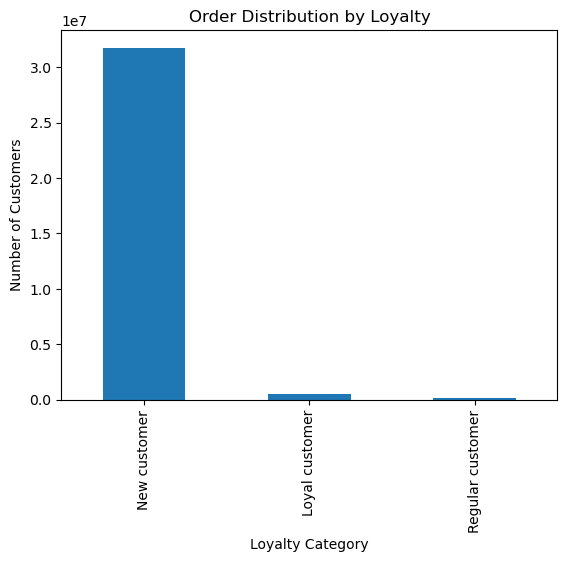

In [17]:
# Bar chart
df['loyalty_flag'].value_counts().plot.bar()
plt.title('Order Distribution by Loyalty')
plt.xlabel('Loyalty Category')
plt.ylabel('Number of Customers')
plt.show()

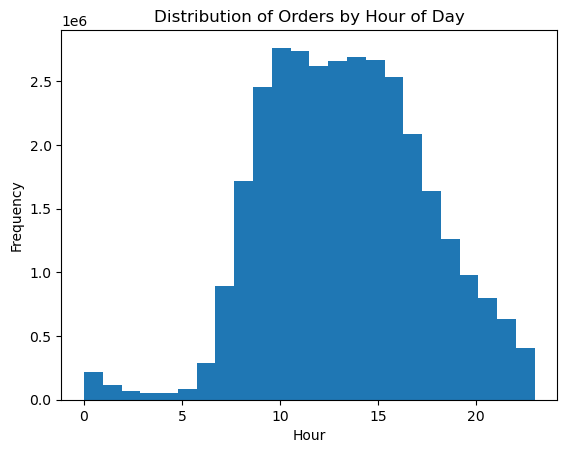

In [21]:
# Histogram
df['order_hour_of_day'].plot.hist(bins=24)
plt.title('Distribution of Orders by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.show()

The histogram shows that most orders occur in the morning hours, peaking around 10 AM.

In [28]:
# Check column names
print(df.columns)

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', '_merge', 'product_name', 'aisle_id',
       'department_id', 'prices', 'product_merge_flag', 'First Name',
       'Surname', 'Gender', 'STATE', 'Age', 'date_joined', 'n_dependants',
       'family_status', 'income', 'avg_order', 'loyalty_flag'],
      dtype='object')


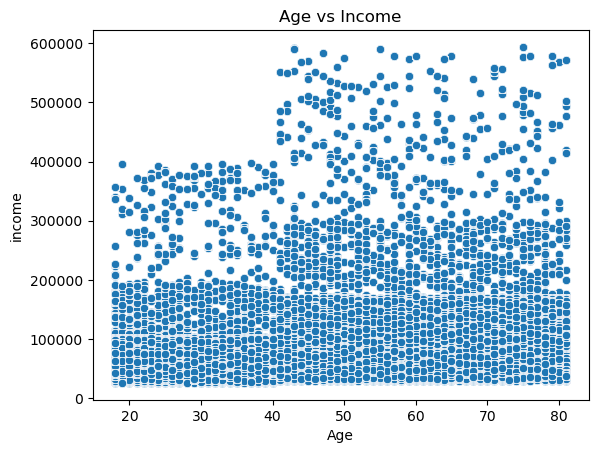

In [32]:
# Scatterplot (Age vs Income)
sns.scatterplot(x='Age', y='income', data=df)
plt.title('Age vs Income')
plt.show()

The scatterplot suggests income is relatively uniform across age, with slight increases for ages 30–50.

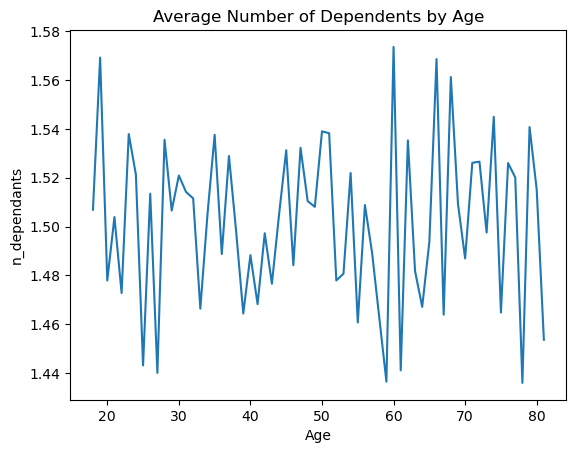

In [37]:
# Line Chart (Age vs Dependants)
line_df = df[['Age', 'n_dependants']].groupby('Age').mean()
sns.lineplot(data=line_df, x=line_df.index, y='n_dependants')
plt.title('Average Number of Dependents by Age')
plt.show()

The line chart shows younger customers (20s–30s) tend to have more dependents, which declines after age 50, and rises again at age 60.

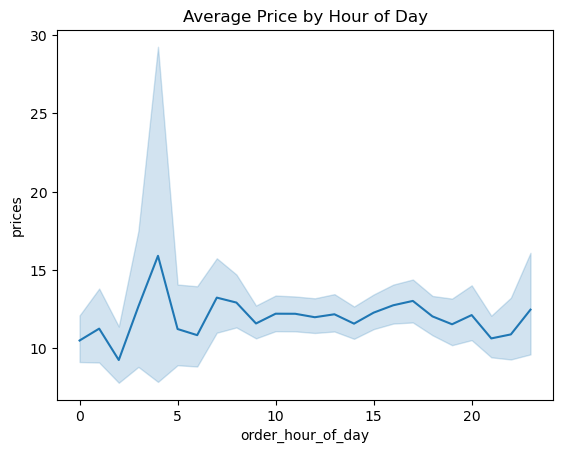

In [42]:
# Line Chart with Sample (Prices by Hour of Day)
np.random.seed(4)
sample = np.random.rand(len(df)) <= 0.3
sample_df = df[sample][['order_hour_of_day', 'prices']]

sns.lineplot(data=sample_df, x='order_hour_of_day', y='prices')
plt.title('Average Price by Hour of Day')
plt.show()

# Step 3: Export the visualizations

In [45]:
# Set the export folder path
export_path = os.path.join(path, '04 Analysis', 'Visualizations')

In [47]:
# Histogram of order_hour_of_day
plt.figure()
df['order_hour_of_day'].plot.hist(bins=24)
plt.title('Distribution of Orders by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.savefig(os.path.join(export_path, 'hist_order_hour.png'))
plt.close()

In [49]:
# Bar Chart of loyalty_flag
plt.figure()
df['loyalty_flag'].value_counts().plot.bar()
plt.title('Order Distribution by Loyalty')
plt.xlabel('Loyalty Category')
plt.ylabel('Number of Customers')
plt.savefig(os.path.join(export_path, 'bar_loyalty_flag.png'))
plt.close()

In [51]:
# Line Chart of order_hour_of_day vs prices
plt.figure()
sns.lineplot(data=sample_df, x='order_hour_of_day', y='prices')
plt.title('Average Price by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Price')
plt.savefig(os.path.join(export_path, 'line_price_by_hour.png'))
plt.close()

In [53]:
# Line Chart of Age vs n_dependants
line_df = df.groupby('Age')['n_dependants'].mean().reset_index()

plt.figure()
sns.lineplot(data=line_df, x='Age', y='n_dependants')
plt.title('Average Number of Dependents by Age')
plt.xlabel('Age')
plt.ylabel('Avg. Number of Dependents')
plt.savefig(os.path.join(export_path, 'line_dependents_by_age.png'))
plt.close()

In [55]:
# Scatterplot of Age vs income
plt.figure()
sns.scatterplot(x='Age', y='income', data=df)
plt.title('Age vs Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.savefig(os.path.join(export_path, 'scatter_age_income.png'))
plt.close()